# K Means Clustering

[Coding Elements](http://www.codingelements.com)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
m1, cov1 = [9, 8], [[1.5, 2],[1, 2]]
m2, cov2 = [5, 13], [[2.5, -1.5],[-1.5, 1.5]]
m3, cov3 = [3, 7], [[0.25, 0.5],[-0.1, 0.5]]

data1 = np.random.multivariate_normal(m1, cov1, 250)
data2 = np.random.multivariate_normal(m2, cov2, 180)
data3 = np.random.multivariate_normal(m3, cov3, 100)

X = np.vstack(( data1, np.vstack((data2, data3)) ))

np.random.shuffle(X)

X.shape


C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """
C:\Users\AASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  import sys


(530, 2)

In [14]:
def kMeans(X, k, max_iters=15, show_animation=False):
    
    row_indexes = np.random.choice(np.arange(len(X)), k)
    centroids = X[row_indexes, :]
    
    for iter in range(max_iters):
        C = np.asarray([np.argmin([np.dot(x-c, x-c) for c in centroids]) for x in X])
        centroids = [ X[C==i].mean(axis=0) for i in range(k)]
        
        if show_animation:
            show(X, C, np.array(centroids))
        
    return np.array(centroids), C
    

<IPython.core.display.Javascript object>


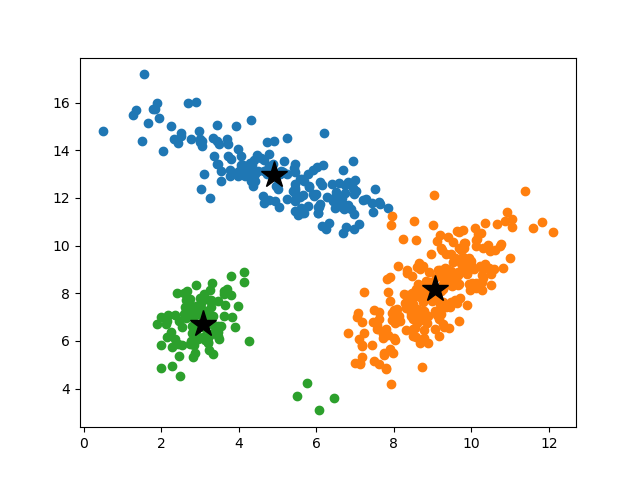

In [17]:
import time

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

def show(X, C, centroids):   
    print('*', end=' ')
    ax.clear()

    num_centroids = centroids.shape[0]
    for i in range(num_centroids):
        ax.plot(X[C == i, 0], X[C == i, 1], 'o')
    
    ax.plot(centroids[:,0],centroids[:,1],'*k',markersize=20)
    
    fig.canvas.draw()
    time.sleep(0.5)

In [18]:
print('Look at the animation above.')
centroids, C = kMeans(X, 3, show_animation=True)

show(X, C, centroids)

print('Done')
print(centroids)

Look at the animation above.
* * * * * * * * * * * * * * * * Done
[[ 4.92286356 12.97544999]
 [ 9.05259037  8.17004504]
 [ 3.09307398  6.72837642]]


[Coding Elements](http://www.codingelements.com)

# K-Means

1. Decide the number of k cluster centers

2. Choose any k random points from your data as cluster centers

3. Assign all other data points to one of these centers based on L1 or L2 distance

4. Take the mean of each new grouping and use as the new cluster center.

5. Iterate until convergaence



#### Instance based algorithm vs Parametric algorithms

KNN - Instance based

K-Means - Parametric


#### How to choose number of centroids?

Loss = Sum of distances of all points form their final assigned centroid

Plot (x) different values of k vs. (y) the corresponding loss. 

The loss will decline and then plateau as k increases.

#### NP-Hard problems 

Don't have an exact solution in polynomial time

They take exponential time to be solved O(2^n)

Clustering 1000 points into 5 groups is NP-Hard

So we use an 'Approximation algorithm' like K-means to reduce complexity from O(2^n) to O(n^k)

#### Overfitting vs Underfitting (Later?)